# PyTorch for Beginners: Image Processing Basics

Introduction to loading, processing, and preparing images for PyTorch models.

## Downloading Sample Images

Fetch digit images from MNIST for demo.

In [2]:
# Download some digit images from MNIST dataset
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_0.jpg" -O "images/mnist_0.jpg"
!wget -q "https://learnopencv.com/wp-content/uploads/2024/07/mnist_1.jpg" -O "images/mnist_1.jpg"

## Importing Libraries

Load PyTorch, OpenCV, NumPy, and Matplotlib.

In [3]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import cv2

## Checking PyTorch Version

Verify PyTorch installation.

In [4]:
print(f'torch version: {torch.__version__}')

torch version: 2.6.0+cu126


## Loading and Displaying Images

Load images, convert to grayscale, and plot.

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

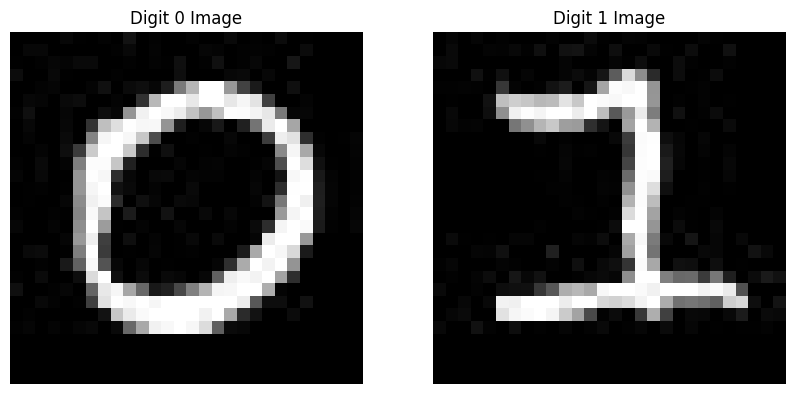

In [ ]:
digit_0_array_og = cv2.imread('images/mnist_0.jpg')
digit_1_array_og = cv2.imread('images/mnist_1.jpg')

digit_0_array_gray = cv2.cvtColor(digit_0_array_og, cv2.COLOR_BGR2GRAY)
digit_1_array_gray = cv2.cvtColor(digit_1_array_og, cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))


axs[0].imshow(digit_0_array_og, cmap='gray',interpolation='none')
axs[0].set_title('Digit 0 Image')
axs[0].axis('off')

axs[1].imshow(digit_1_array_gray, cmap='gray',interpolation='none')
axs[1].set_title('Digit 1 Image')
axs[1].axis('off')

plt.show()

## Inspecting Image Properties

Check shape and pixel values.

In [15]:
print(f'Image array shape: {digit_1_array_og.shape}')
print(f"min pixel value: {np.min(digit_1_array_og)}; max pixel value: {np.max(digit_1_array_og)}")

Image array shape: (28, 28, 3)
min pixel value: 0; max pixel value: 255


## Converting to PyTorch Tensors

Convert arrays to tensors and normalize.

Shape if normalized image tensor: torch.Size([28, 28, 3])
Min pixel value of normalized image tensor: 0.0; Max pixel value of normalized image tensor: 1.0


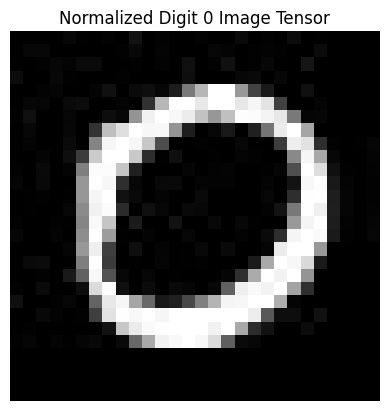

In [22]:
img_tensor_0 = torch.tensor(digit_0_array_og, dtype=torch.float32)/255.0
img_tensor_1 = torch.tensor(digit_1_array_og, dtype=torch.float32)/255.0

print(f"Shape if normalized image tensor: {img_tensor_0.shape}")
print(f"Min pixel value of normalized image tensor: {torch.min(img_tensor_0)}; Max pixel value of normalized image tensor: {torch.max(img_tensor_0)}")  

plt.imshow(img_tensor_0, cmap='gray')
plt.title('Normalized Digit 0 Image Tensor')
plt.axis('off')
plt.show()

## Creating a Batch

Stack tensors into a batch.

In [24]:
batch_tensor = torch.stack([img_tensor_0, img_tensor_1])
print(f'Shape of batch tensor: {batch_tensor.shape}')

Shape of batch tensor: torch.Size([2, 28, 28, 3])


## Preparing Input for Models

Permute to NCHW format.

In [27]:
batch_input = batch_tensor.permute(0, 3, 1, 2)  # Change from (B, H, W, C) to (B, C, H, W)
print(f'Shape of batch input tensor: {batch_input.shape}')

Shape of batch input tensor: torch.Size([2, 3, 28, 28])


## Introduction to PyTorch Tensors

Create and explore different tensor types and shapes.

In [44]:
# introduction to tensors and its operations 

a = torch.ones(5)
print(f"a → {a}")
b = torch.zeros(5)
print(f"b → {b}")

c= torch.ones((3,4))
print(f"c → {c}")
d = torch.tensor([1.0, 2.0, 3.0,4.0,5.0])
print(f"d → {d}")

e = torch.tensor([[1,2,3],[4,5,6]])
print(f"e → {e}")

f = torch.tensor([[[1,2],[3,4]],[[5,6],[7,8]]])
print(f"f → {f}")

a → tensor([1., 1., 1., 1., 1.])
b → tensor([0., 0., 0., 0., 0.])
c → tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
d → tensor([1., 2., 3., 4., 5.])
e → tensor([[1, 2, 3],
        [4, 5, 6]])
f → tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])


## Tensor Shapes

Examine the dimensions of different tensors.

In [40]:
print(f"a → {a.shape}\nb → {b.shape}\nc → {c.shape}\nd → {d.shape}\ne → {e.shape}\nf →{f.shape}\n")

a → torch.Size([5])
b → torch.Size([5])
c → torch.Size([3, 4])
d → torch.Size([5])
e → torch.Size([2, 3])
f →torch.Size([2, 2, 2])



## Indexing and Slicing

Access and manipulate tensor elements.

In [49]:
# indexing and slicing
print(f"a[0] → {a[0]}")
print(f"b[3] → {b[3]}")
print(f"c[2,1] → {c[2,1]}")
print(f"d[3] → {d[3]}")
print(f"e[1,2] → {e[1,2]}")
print(f"f[1,0,1] → {f[1,0,1]}")

a[0] → 1.0
b[3] → 0.0
c[2,1] → 1.0
d[3] → 4.0
e[1,2] → 6
f[1,0,1] → 6
